Exercise 1.10

In [9]:
# (a) Since we have fair  coints, the probability of head μ for a coin = 0.5

# The μ for three coins selected = 0.5


In [14]:
numCoins = 1000
numFlips = 10


In [15]:
import numpy as np

In [16]:
def computeFn(numCoins,numFlips,flag = False):
    #simulate flipping
    flips = np.random.randint(0,2,(numCoins,numFlips))
    
    #compute v for each coin
    freq = np.mean(flips, axis=1)
    
    #computing v1, vrand, vmin
    v1 = freq[0]
    vrand = np.random.choice(freq)
    vmin = np.min(freq)
    
    if flag:
        print("frequence of first coin: ",v1)
        print("frequence of random coin: ",vrand)
        print("frequence of coin with min frequencey: ",vmin)
    
    return v1,vrand,vmin    
    

In [17]:
computeFn(numCoins,numFlips,True)


frequence of first coin:  0.5
frequence of random coin:  0.6
frequence of coin with min frequencey:  0.0


(np.float64(0.5), np.float64(0.6), np.float64(0.0))

In [22]:
import matplotlib.pyplot as plt

In [20]:
#to repeat the experiment for large no. of times (#99999)
v1s,vrands,vmins = [],[],[]
for i in range(99999):
    v1,vrand,vmin = computeFn(numCoins,numFlips)
    v1s.append(v1)
    vrands.append(vrand)
    vmins.append(vmin)
    


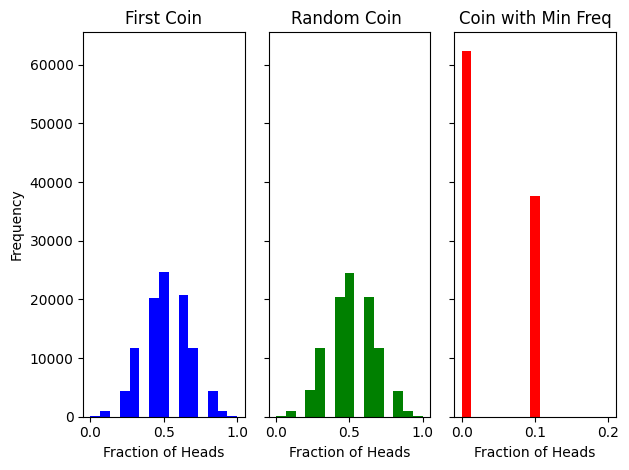

In [27]:
#plot
nbins = 15
fig, axs = plt.subplots(1,3, sharey =True, tight_layout=True)

axs[0].hist(v1s, bins=nbins, color='blue')
axs[0].set_title("First Coin")
axs[0].set_xlabel('Fraction of Heads')
axs[0].set_ylabel('Frequency')

axs[1].hist(vrands, bins=nbins, color='green')
axs[1].set_title("Random Coin ")
axs[1].set_xlabel('Fraction of Heads')

axs[2].hist(vmins, bins=nbins, color='red')
axs[2].set_title("Coin with Min Freq")
axs[2].set_xlabel('Fraction of Heads')

plt.show()

In [29]:
''' The coins that end up being crand and cmin may differ form one run to another because 
the probability of the same coins getting same fraction of heads for every run is close to impossible. '''

' The coins that end up being crand and cmin may differ form one run to another because \nthe probability of the same coins getting same fraction of heads for every run is close to impossible. '

In [31]:
type(v1s)

list

In [32]:
numRuns = 99999

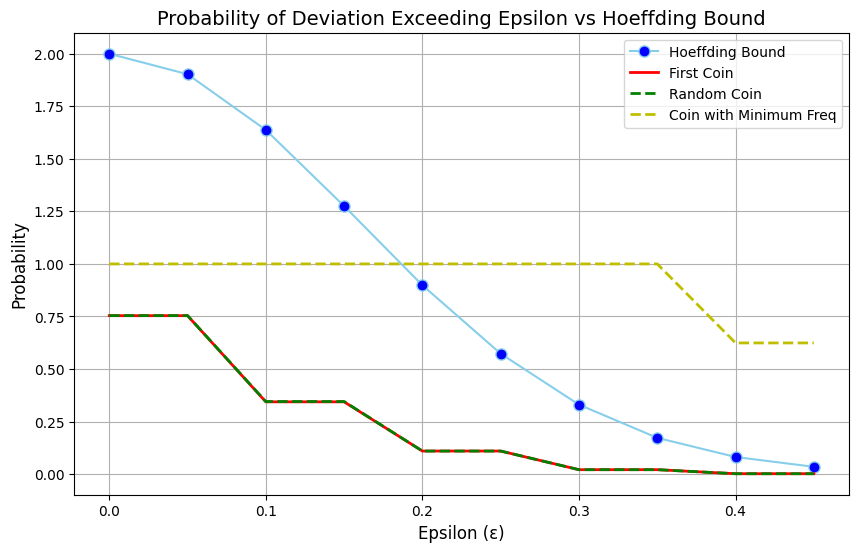

In [34]:

# (c) Hoeffding bounds
def hoeffding_bound(eps, n):
    return 2 * np.exp(-2 * n * eps ** 2)

eps = np.arange(0.0,0.5,0.05)
bounds = hoeffding_bound(eps, numFlips)
v1s,vrands,vmins = np.array(v1s),np.array(vrands),np.array(vmins)

#to find absolute difference of v from μ
v1d = np.abs(v1s-0.5)
vrandd = np.abs(vrands-0.5)
vmind = np.abs(vmins-0.5)

p1, prand, pmin = np.zeros(len(eps)),np.zeros(len(eps)),np.zeros(len(eps))

for i in range(eps.shape[0]):
    ep = eps[i]
    p1[i] = np.sum(v1d > ep)/numRuns
    prand[i] = np.sum(vrandd > ep)/numRuns
    pmin[i] = np.sum(vmind > ep)/numRuns
    
# Plotting the results
plt.figure(figsize=(10, 6))  # Set figure size

plt.plot(eps, bounds, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', label='Hoeffding Bound')

# Plot the probability for the first coin
plt.plot(eps, p1, marker='', color='r', linewidth=2, label='First Coin')

# Plot the probability for the random coin
plt.plot(eps, prand, marker='', color='g', linewidth=2, linestyle='dashed', label='Random Coin')

# Plot the probability for the coin with minimum frequency
plt.plot(eps, pmin, marker='', color='y', linewidth=2, linestyle='dashed', label='Coin with Minimum Freq')

plt.xlabel('Epsilon (ε)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Probability of Deviation Exceeding Epsilon vs Hoeffding Bound', fontsize=14)

plt.legend(loc='upper right')

plt.grid(True)
plt.show()